In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "..\dataset\PlantVillage\\tomato",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\baps\AppData\Local\Temp\ipykernel_21308\2813355457.py:2: SyntaxWarning: invalid escape sequence '\d'
  "..\dataset\PlantVillage\\tomato",


Found 16011 files belonging to 10 classes.


In [4]:
tomato_decis_classcis = dataset.class_names
dataset_size=len(dataset)
print(tomato_decis_classcis)
print(dataset_size)
len(tomato_decis_classcis)

['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
501


10

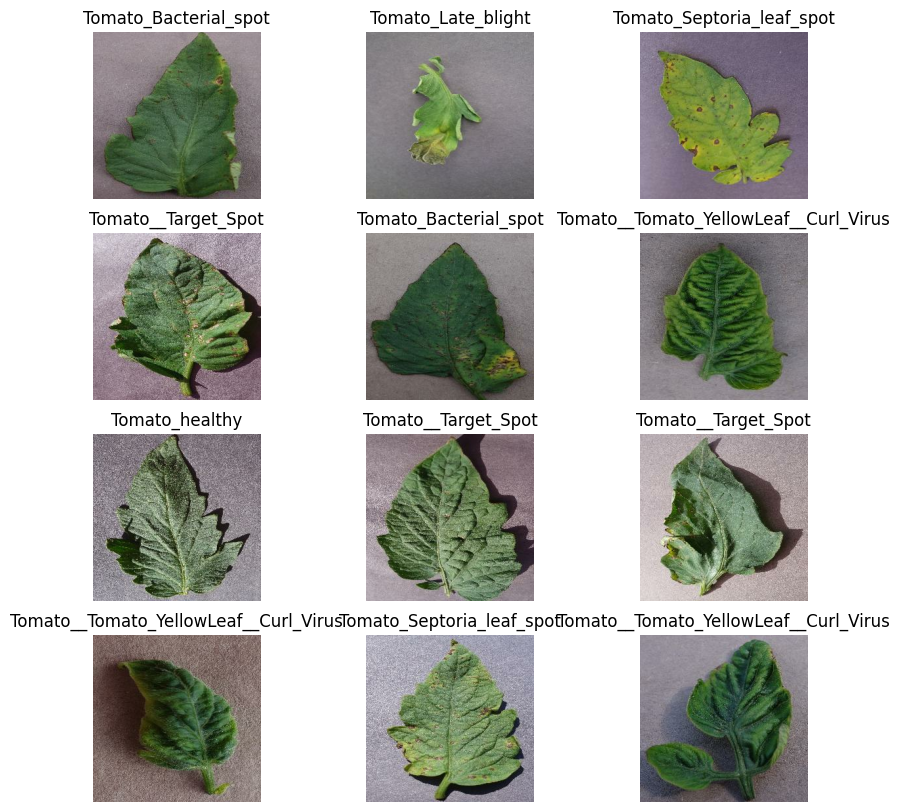

In [5]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(tomato_decis_classcis[labels_batch[i]])
        plt.axis("off")

In [6]:
train_size = 0.8
train_ds = dataset.take(int(dataset_size*train_size))
test_ds = dataset.skip(int(dataset_size*train_size)).take(int(.1*dataset_size))
val_ds = dataset.skip(int(train_size*dataset_size)+int(.1*dataset_size))

In [7]:
print(len(train_ds))
print(len(test_ds))
print(len(val_ds))

400
50
51


In [8]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  tf.keras.layers.Rescaling(1./255),
])

In [9]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

In [10]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)


In [11]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(tomato_decis_classcis)
model =tf.keras.models.Sequential([
    resize_and_rescale,
    tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

c:\Users\baps\OneDrive\Desktop\Projects\aiml\practice\aimlenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 12544)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,778 (3.42 MB)

 Trainable params: 896,778 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [17]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=40,
)

Epoch 1/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 415s 1s/step - accuracy: 0.9462 - loss: 0.1574 - val_accuracy: 0.8591 - val_loss: 0.5349
Epoch 2/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 389s 971ms/step - accuracy: 0.9525 - loss: 0.1378 - val_accuracy: 0.8703 - val_loss: 0.5545
Epoch 3/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 343s 855ms/step - accuracy: 0.9507 - loss: 0.1424 - val_accuracy: 0.9268 - val_loss: 0.2140
Epoch 4/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 341s 852ms/step - accuracy: 0.9600 - loss: 0.1148 - val_accuracy: 0.9460 - val_loss: 0.1531
Epoch 5/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 340s 850ms/step - accuracy: 0.9605 - loss: 0.1075 - val_accuracy: 0.9181 - val_loss: 0.2591
Epoch 6/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 340s 850ms/step - accuracy: 0.9560 - loss: 0.1300 - val_accuracy: 0.9503 - val_loss: 0.1645
Epoch 7/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 340s 849ms/step - accuracy: 0.9635 - loss: 0.0998 - val_accuracy: 0.9143 - val_loss: 0.2762
Epoch 8/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 342s 853ms/step - accuracy: 0.9608 - lo

In [18]:
model.save("../models/tomatoPlant.h5")

In [19]:
model.evaluate(test_ds)

50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - accuracy: 0.9625 - loss: 0.1420


[0.1420636773109436, 0.9612500071525574]